# Laboratoire 4 : Développement d’un système intelligent
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexandre Laroche - LARA12078907<br>Marc-Antoine Charland - CHAM16059609<br>Jonathan Croteau-Dicaire - CROJ10109402    |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Été 2019                                            |
| Groupe                | 02                                                      |
| Numéro du laboratoire | TP-04                                                   |
| Professeur            | Prof. Alessandro L. Koarich                             |
| Chargé de laboratoire | Pierre-Luc Delisle                                                     |
| Date                  | 5 août 2019 (23h55)                                                    |

In [1]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from src import constants

In [6]:
def load_feature_set(name):

    file_path = path.join(constants.RAW_TAGGED_FEATURE_SET_PATH, "msd-" + name + "/msd-" + name + ".csv")
    
    ftrs = np.array(pd.read_csv(file_path, header=None).values[:,2:-1])
    lbls = np.array(pd.read_csv(file_path, header=None).values[:,-1])
    
    return ftrs, lbls

def scale_features(ftrs):
    
    scaler = StandardScaler()
    ftrs_scld = scaler.fit_transform(ftrs)
    
    return ftrs_scld

def display_explained_variance_plot(estimator):
    
    plt.figure()
    plt.plot(np.cumsum(estimator.explained_variance_ratio_))
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Variance')
    plt.show()
    
def nb_component_to_target_ratio(target_ratio, explained_variance_ratios):
    """
    Compte le nombre de composantes nécessaire pour atteindre le 
    ratio de la variance expliqué par les composante désiré.
    
    args:
        target_ratio: decimal % désiré de la variance expliquée 
            par les composantes
        explained_variance_ratios: Liste des ratios expliquant la 
            variance de chaque composante (eigenvectors)
    """
    
    var_sum = 0
    nb_comp = 0
    
    for comp_var_ratio in explained_variance_ratios:
        
        var_sum += comp_var_ratio
        
        if(var_sum < target_ratio):
            nb_comp += 1
        else:
            break
    
    return nb_comp
    

## marsyas_dev_new

In [4]:
mary_raw_ftrs, mary_raw_lbls = load_feature_set('marsyas_dev_new')
mary_ftrs = scale_features(mary_raw_ftrs)

marsyas_dev_new - PCA


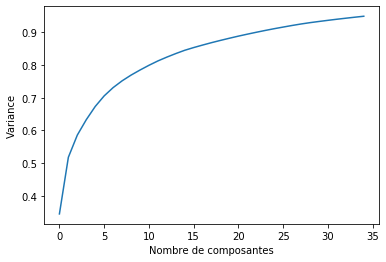

Nombre de composante pseudo-optimal :35


In [15]:
mary_pca = PCA(n_components=35)
mary_pca_reduced_ftrs = mary_pca.fit_transform(mary_ftrs, mary_raw_lbls)
mary_pca_nb_comp = nb_component_to_target_ratio(0.995, mary_pca.explained_variance_ratio_)

print("marsyas_dev_new - PCA")
display_explained_variance_plot(mary_pca)
print("Nombre de composante pseudo-optimal :" + str(mary_pca_nb_comp))

marsyas_dev_new - LDA


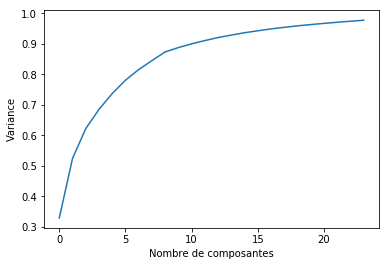

Nombre de composante pseudo-optimal :17


In [10]:
mary_lda = LDA(solver='eigen', n_components=None, shrinkage=0.00001)
mary_lda_reduced_ftrs = mary_lda.fit(mary_ftrs, mary_raw_lbls).transform(mary_ftrs)
mary_lda_nb_comp = nb_component_to_target_ratio(0.95, mary_lda.explained_variance_ratio_)

print("marsyas_dev_new - LDA")
display_explained_variance_plot(mary_lda)
print("Nombre de composante pseudo-optimal :" + str(mary_lda_nb_comp))

Ah! Cela explique peut-être pourquoi la performance du NN est réduite avec LDA. Le nombre maximal de composantes permit par LDA permet seulement de représenter 70% de la variance. Dans les notes de cours, c'est sugérer de prendre le nombre de composantes qui explique au moins 90% de la variance.

## ssd_dev

In [7]:
ssd_raw_ftrs, ssd_raw_lbls = load_feature_set('ssd_dev')
ssd_ftrs = scale_features(ssd_raw_ftrs)

ssd_dev - PCA


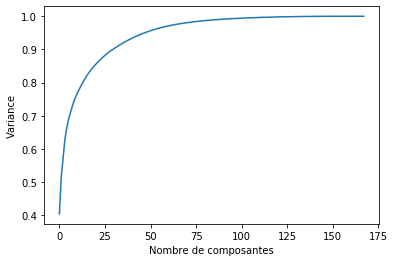

Nombre de composante pseudo-optimal :104


In [10]:
ssd_pca = PCA(n_components=None)
ssd_pca_reduced_ftrs = ssd_pca.fit_transform(ssd_ftrs, ssd_raw_lbls)
ssd_pca_nb_comp = nb_component_to_target_ratio(0.995, ssd_pca.explained_variance_ratio_)

print("ssd_dev - PCA")
display_explained_variance_plot(ssd_pca)
print("Nombre de composante pseudo-optimal :" + str(ssd_pca_nb_comp))

marsyas_dev_new - LDA


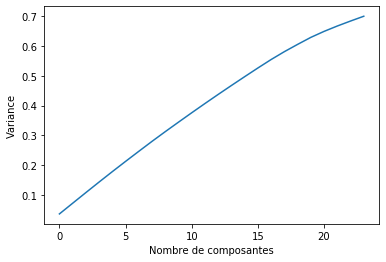

Nombre de composante pseudo-optimal :24


In [11]:
ssd_lda = LDA(solver='eigen', n_components=None, shrinkage='auto')
ssd_lda_reduced_ftrs = ssd_lda.fit(ssd_raw_ftrs, ssd_raw_lbls).transform(ssd_raw_ftrs)
ssd_lda_nb_comp = nb_component_to_target_ratio(0.995, ssd_lda.explained_variance_ratio_)

print("marsyas_dev_new - LDA")
display_eplained_variance_plot(ssd_lda)
print("Nombre de composante pseudo-optimal :" + str(ssd_lda_nb_comp))

Le nombre maximum de composante explique seulement 70% de la variance.

## jmirderivatives_dev

In [4]:
deriv_raw_ftrs, deriv_raw_lbls = load_feature_set('jmirderivatives_dev')
deriv_ftrs = scale_features(deriv_raw_ftrs)

jmirderivatives_dev - PCA


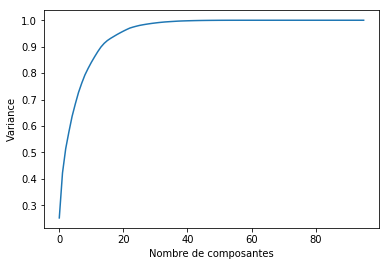

Nombre de composante pseudo-optimal :19


In [5]:
deriv_pca = PCA(n_components=None)
deriv_pca_reduced_ftrs = deriv_pca.fit_transform(deriv_ftrs, deriv_raw_lbls)
deriv_pca_nb_comp = nb_component_to_target_ratio(0.95, deriv_pca.explained_variance_ratio_)

print("jmirderivatives_dev - PCA")
display_explained_variance_plot(deriv_pca)
print("Nombre de composante pseudo-optimal :" + str(deriv_pca_nb_comp))

jmirderivatives_dev - LDA


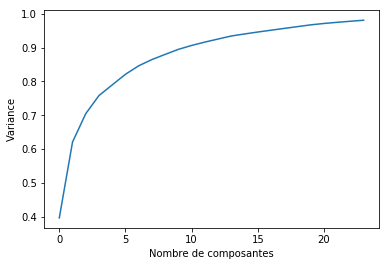

Nombre de composante pseudo-optimal :16


In [14]:
deriv_lda = LDA(solver='eigen', n_components=None, shrinkage=0.000000000000000001)
deriv_lda_reduced_ftrs = deriv_lda.fit(deriv_raw_ftrs, deriv_raw_lbls).transform(deriv_raw_ftrs)
deriv_lda_nb_comp = nb_component_to_target_ratio(0.95, deriv_lda.explained_variance_ratio_)

print("jmirderivatives_dev - LDA")
display_explained_variance_plot(deriv_lda)
print("Nombre de composante pseudo-optimal :" + str(deriv_lda_nb_comp))